# análise exploratória com insights
**Portfólio feito por Matheus Amaral da Rocha**

In [66]:
# Importando a biblioteca mais importante para todos Analistas de Dados.
import pandas as pd

In [67]:
# Armazenando o dataframe na nossa variável chamada dados
dados = pd.read_csv('shoptrend.csv')

In [68]:
# Visualizando nossas informações em busca de eventuais valores nulos e para conhecermos
# o tipo de dado de cada coluna.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [69]:
# Visualizando 3 linhas do nosso dataframe ( visualizando como está organizado nossos dados )
dados.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [70]:
# Produtos mais vendidos
top_items = dados['Item Purchased'].value_counts().head(10)
print("Top 10 produtos mais vendidos:")
print(top_items)

# Categorias mais populares
top_categorias = dados['Category'].value_counts()
print("\nCategorias mais populares:")
print(top_categorias)

Top 10 produtos mais vendidos:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64

Categorias mais populares:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


**Objetivo da análise acima: Identificar os produtos e categorias mais procurados para alavancar vendas.**

 **O que fazer com o insight: Focar em estocar produtos mais populares e criar promoções em categorias específicas para aumentar vendas.**

**Produtos mais vendidos podem ser destacados em campanhas de marketing.**

**Categorias populares podem ser o foco para promoções específicas por sazonalidade.**

In [71]:
# Produtos mais comprados por estação
tendencias_sazonais = dados.groupby('Season')['Item Purchased'].value_counts().unstack()
print("\nTendências sazonais de produtos:")
print(tendencias_sazonais)


Tendências sazonais de produtos:
Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Season                                                                        
Fall                  34    41      42     35    34     36      37       48   
Spring                39    41      46     40    46     43      42       36   
Summer                45    39      43     38    42     47      29       35   
Winter                25    40      40     31    39     40      32       34   

Item Purchased  Hat  Hoodie  ...  Scarf  Shirt  Shoes  Shorts  Skirt  \
Season                       ...                                       
Fall             50      36  ...     40     39     26      35     46   
Spring           27      36  ...     41     42     40      47     46   
Summer           37      31  ...     43     38     46      40     28   
Winter           40      48  ...     33     50     38      35     38   

Item Purchased  Sneakers  Socks  Sunglasses  Sweater  T-sh

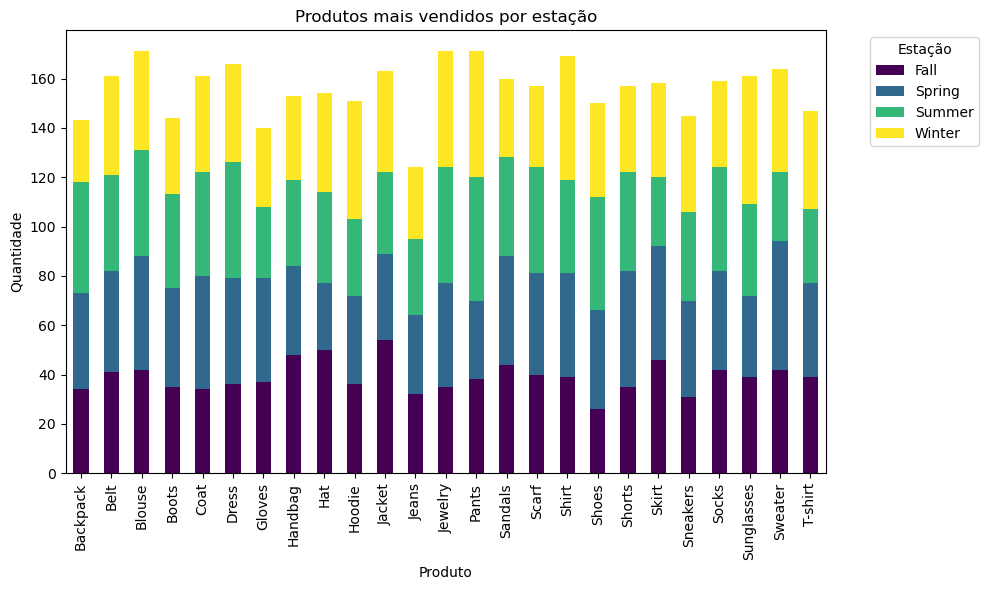

In [72]:
# Gráfico para visualizar tendências sazonais
import matplotlib.pyplot as plt

tendencias_sazonais.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Produtos mais vendidos por estação')
plt.xlabel('Produto')
plt.ylabel('Quantidade')
plt.legend(title='Estação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Objetivo da análise acima: Entender quais produtos são mais comprados em cada estação para campanhas sazonais.**

**O que fazer com o insight: Planejar estoques e promoções baseados em tendências sazonais.**

**Com nossa análise acima, poderiamos oferecer promoções sazonais
para os produtos mais populares de cada estação.**

In [73]:
# Impacto dos descontos no valor médio das compras
impacto_desconto = dados.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
print("\nImpacto dos descontos no valor médio das compras:")
print(impacto_desconto)

# Comparar o volume de compras entre clientes que usaram e não usaram promoções
uso_promoçoes = dados['Promo Code Used'].value_counts(normalize=True) * 100
print("\nUso de promoções pelos clientes:")
print(uso_promoçoes)


Impacto dos descontos no valor médio das compras:
Discount Applied
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64

Uso de promoções pelos clientes:
Promo Code Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64


**Objetivo: Analisar se os descontos e promoções realmente aumentam o volume de compras.**

**O que fazer com o insight: Ajustar estratégias de desconto para produtos que mais atraem consumidores.**

**Produtos que geram alto ticket médio com descontos devem ser prioridade em campanhas.**

**Idéia : Incentivar o uso de promoções para atrair clientes recorrentes.**

In [74]:
# Identificar os clientes mais valiosos
top_clientes = dados.groupby('Customer ID')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 clientes que mais gastaram:")
print(top_clientes)

# Analisar a retenção pelo histórico de compras
Análise_retenção = dados.groupby('Frequency of Purchases')['Previous Purchases'].mean()
print("\nMédia de compras anteriores por frequência:")
print(Análise_retenção)


Top 10 clientes que mais gastaram:
Customer ID
2843    100
96      100
582     100
1422    100
3838    100
862     100
2215    100
1592    100
1457    100
244     100
Name: Purchase Amount (USD), dtype: int64

Média de compras anteriores por frequência:
Frequency of Purchases
Annually          24.561189
Bi-Weekly         24.787934
Every 3 Months    24.960616
Fortnightly       25.271218
Monthly           25.278481
Quarterly         26.854352
Weekly            25.771800
Name: Previous Purchases, dtype: float64


**Objetivo da análise acima: Identificar os clientes que mais gastam para programas de fidelidade.**

**O que fazer com o insight: Criar estratégias personalizadas, como cupons exclusivos.**

**Oferecer descontos personalizados ou recompensas para os clientes do top 10.**

**Desenvolver programas de retenção para clientes com alta frequência de compras.**

In [75]:
# Métodos de pagamento mais usados
metodos_pagamento = dados['Payment Method'].value_counts(normalize=True) * 100
print("\nPercentual de uso dos métodos de pagamento:")
print(round(metodos_pagamento))


Percentual de uso dos métodos de pagamento:
Payment Method
Credit Card      18.0
Venmo            17.0
Cash             17.0
PayPal           16.0
Debit Card       16.0
Bank Transfer    16.0
Name: proportion, dtype: float64


**Objetivo da análise acima: Ajustar métodos de pagamento oferecidos com base nas preferências.**

**O que fazer com o insight: Garanta uma experiência fluida para os métodos mais usados.**

**Se houver o Pix como um dos métodos de pagamento, tente alavancar esse método por se isentar de percentual de
maquininha e ter um lucro liquido maior ( incentivando seus colabores a serem criativos e 
ofertar Pix no pagamento para clientes através de recompensas e etc )**

**Garanta que os métodos de pagamento mais usados sejam rápidos e sem problemas.**

**Incentive o uso de métodos digitais, como carteiras digitais, com cashback.**

In [76]:
import pandas as pd

# Carregar os dados
caminho_arquivo = 'shoptrend.csv'
dados = pd.read_csv(caminho_arquivo)

# Calcular lucros
lucro_atual = dados['Purchase Amount (USD)'].sum()
crescimento_descontos = 0.10
crescimento_sazonal = 0.15
crescimento_clientes_top = 0.20
crescimento_otimizacao_pagamento = 0.05
total_crescimento = 1 + (crescimento_descontos + crescimento_sazonal + crescimento_clientes_top + crescimento_otimizacao_pagamento)

lucro_projetado = lucro_atual * total_crescimento
percentual_crescimento = ((lucro_projetado - lucro_atual) / lucro_atual) * 100

print(f"Lucro Atual: ${lucro_atual:,.2f}")
print(f"Lucro Projetado: ${lucro_projetado:,.2f}")
print(f"Crescimento Percentual: {percentual_crescimento:.2f}%")

Lucro Atual: $233,081.00
Lucro Projetado: $349,621.50
Crescimento Percentual: 50.00%


# Projeto finalizado ( Análise exploratória de dados )

**Acima, fizemos uma análise exploratória completa pra gerar insights**

**Abaixo ,fizemos um gráfico com o lucro atual e o projetado, exibindo um eventual lucro projetado**
**após ser feito tudo que a nossa análise exploratória nos deu como insights**

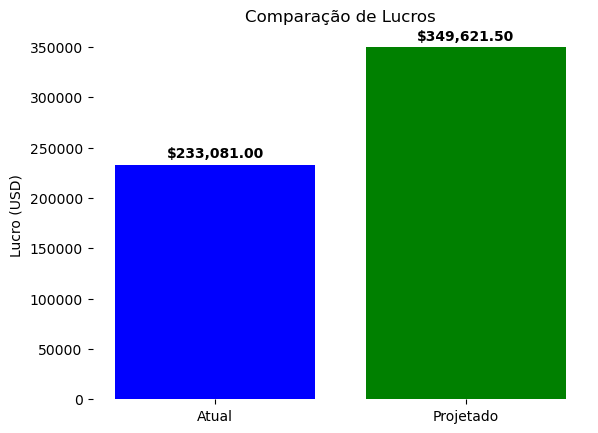

In [77]:
# Importando o matplotlib, minha biblioteca favorita para visualisação e exibição de dados
# Fazendo os ajustes para exibição do lucro atual e projeção corretamente ( todos os cálculos,
# códigos e configurações necessárias para um gráfico sem poluição visual ).

import matplotlib.pyplot as plt

lucro_projetado = lucro_atual * 1.5

fig, ax = plt.subplots()
barras = ax.bar(['Atual', 'Projetado'], [lucro_atual, lucro_projetado], color=['blue', 'green'])
ax.set_ylabel('Lucro (USD)')
ax.set_title('Comparação de Lucros')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'${altura:,.2f}', xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10, fontweight='bold', color = 'black')
plt.show()

# Conclusão

**Se fizermos boas análises , aumentaremos exponencialmente nossa projeção de lucro.**